# GBM (Gradient Boost Machine)
![image](https://user-images.githubusercontent.com/70187490/130928966-466a038b-d82b-4b73-b6b8-5e064759bf34.png)

- 부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- GBM은 가중치 업데이트를 경사 하강법을 이용
- 분류의 실제 결괏값을 $y$, 피처를 $x_1, x_2, ... , x_n$, 그리고 이 피처에 기반한 예측 함수를 $F(x)$라고 하면 오류식은 $h(x)=y-F(x)$가 된다.  
$\rightarrow$ 이 오류식 $h(x) = y - F(x)$를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 경사 하강법

- 일반적으로 GBM이 랜덤포레스트보다 예측 성능이 조금 뛰어나지만 수행시간이 오래 걸리고 하이퍼 파라미터 튜닝 노력디 더 필요함
- GBM은 멀티 CPU 코어 시스템을 사용하더라도 병렬처리가 지원되지 않아 대용량 데이터의 경우 학습에 매우 많은 시간이 필요함

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import numpy as np
    
iris = load_iris()
gb_clf = GradientBoostingClassifier(random_state=156)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=156)

In [2]:
gb_clf.fit(X_train, y_train)
pred = gb_clf.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)

print(conf_mat)
accuracy_score(pred, y_test)

[[ 9  0  0]
 [ 0  9  0]
 [ 0  0 12]]


1.0

# GBM 하이퍼 파라미터 및 튜닝
![image](https://user-images.githubusercontent.com/70187490/130946350-134bfda1-6de0-40f8-96e1-cf44b67b2bdd.png)

In [3]:
def visualize_boundary(estimator, X, y, columns, title=None):
    
    estimator.fit(X, y)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolor='k', s=20, zorder=3)
    ax.axis('tight')
    
    x_lim_start, x_lim_end = ax.get_xlim()
    y_lim_start, y_lim_end = ax.get_ylim()
    
    xx, yy = np.meshgrid( np.arange(x_lim_start, x_lim_end, 0.02),
                          np.arange(y_lim_start, y_lim_end, 0.02) )
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.5, 
                levels = np.arange(len(np.unique(y))+1)-0.5,
                cmap='rainbow');
    
    plt.xlabel(iris.feature_names[columns[0]], fontsize=16)
    plt.ylabel(iris.feature_names[columns[1]], fontsize=16)
    
    if title==None:
        pass
    else:
        plt.title(str(title), fontsize=16)

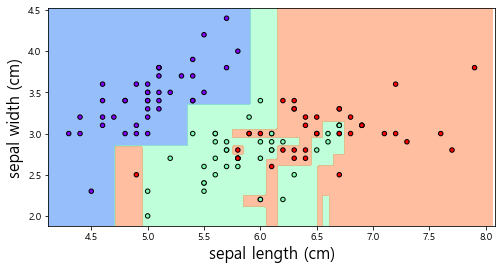

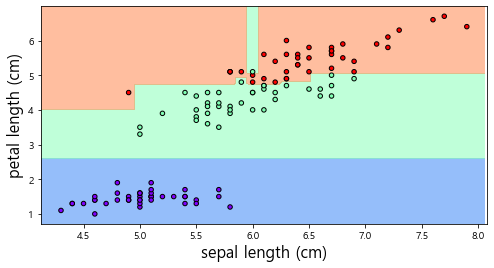

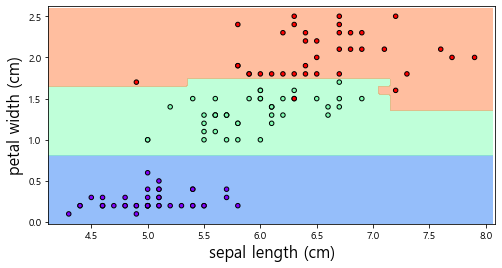

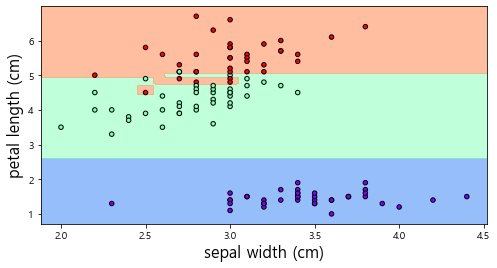

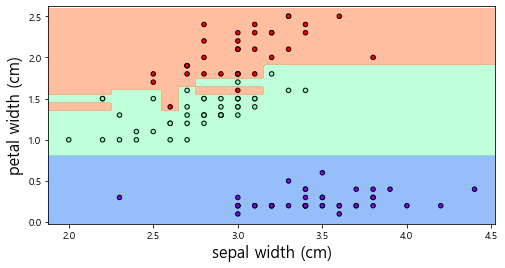

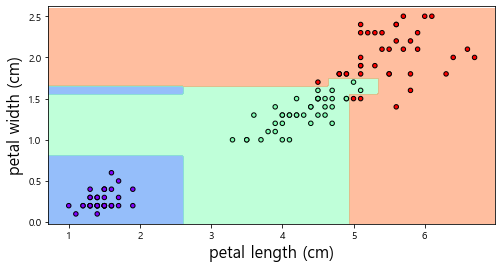

In [4]:
for i in  [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]:
    visualize_boundary(gb_clf, X_train[:,i], y_train, i)

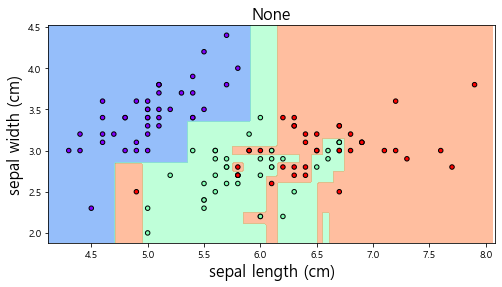

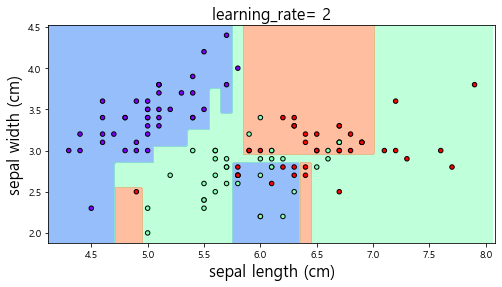

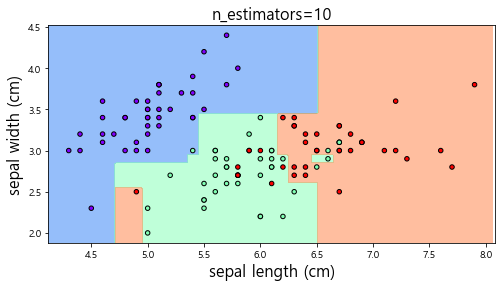

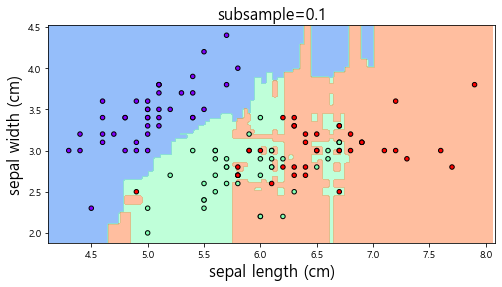

In [20]:
gb_clf = GradientBoostingClassifier(random_state=156)
visualize_boundary(gb_clf, X_train[:,[0,1]], y_train, [0,1], title='None')

# learning_rate를 조정(일반적으로 0에서 1사이 값 그중에서도 0.01이나 0.1을 선호하나 과소적합 visualize을 위해 큰 값을 선정)
gb_clf = GradientBoostingClassifier(learning_rate= 2, random_state=156)
visualize_boundary(gb_clf, X_train[:,[0,1]], y_train, [0,1], title='learning_rate= 2')

# weak learner의 갯수를 제한(default=100)
gb_clf = GradientBoostingClassifier(n_estimators=10, random_state=156)
visualize_boundary(gb_clf, X_train[:,[0,1]], y_train, [0,1], title='n_estimators=10')

# 학습에 사용하는 데이터 샘플링 비율(default=1)
gb_clf = GradientBoostingClassifier(subsample=0.1, random_state=156)
visualize_boundary(gb_clf, X_train[:,[0,1]], y_train, [0,1], title='subsample=0.1')

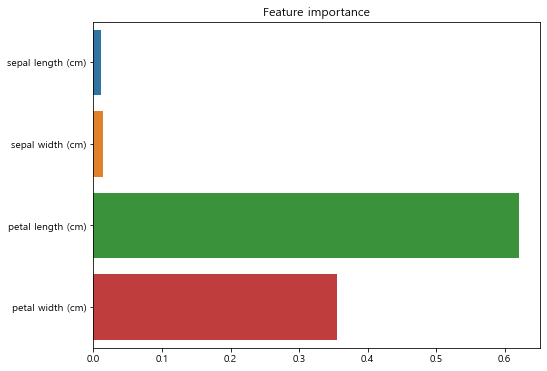

In [21]:
import pandas as pd
import seaborn as sns

gb_clf=GradientBoostingClassifier(random_state=156)
gb_clf.fit(X_train, y_train)

gb_importance_values = gb_clf.feature_importances_
gb_importance = pd.Series(gb_importance_values, index=iris.feature_names)

plt.figure(figsize=(8, 6))
plt.title('Feature importance')
sns.barplot(x=gb_importance, y=gb_importance.index);

# Gredient Boosting 하이퍼 파라미터 튜닝

In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[80, 90, 100, 120],
    'max_depth':[1, 2, 3, 5, 10, None],
    'min_samples_leaf':[1, 2, 3, 4, 5]
}

gb_clf = GradientBoostingClassifier(random_state=156)
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 90}
최고 예측 정확도: 0.9500


In [25]:
param_df = pd.DataFrame(grid_cv.cv_results_).sort_values(by='mean_test_score', ascending=False)
param_df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
49,0.283064,0.023063,0.001600,0.000491,3,3,90,"{'max_depth': 3, 'min_samples_leaf': 3, 'n_est...",0.916667,0.958333,0.958333,0.958333,0.958333,0.950000,0.016667,1
111,0.725014,0.036261,0.002856,0.001577,None,3,120,"{'max_depth': None, 'min_samples_leaf': 3, 'n_...",0.916667,0.958333,0.958333,0.958333,0.958333,0.950000,0.016667,1
91,0.666683,0.033090,0.002201,0.000981,10,3,120,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.916667,0.958333,0.958333,0.958333,0.958333,0.950000,0.016667,1
60,0.308276,0.016561,0.002241,0.001032,5,1,80,"{'max_depth': 5, 'min_samples_leaf': 1, 'n_est...",0.875000,0.958333,0.958333,0.958333,0.958333,0.941667,0.033333,4
71,0.491047,0.015773,0.001401,0.000489,5,3,120,"{'max_depth': 5, 'min_samples_leaf': 3, 'n_est...",0.916667,0.958333,0.958333,0.958333,0.916667,0.941667,0.020412,4
